In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.duration.hazard_regression as coxph
import lifelines
#from lifelines.datasets import load_rossi
import matplotlib.pyplot as plt
import dcurves

In [2]:
pd.set_option('display.max_rows', 500)


In [5]:
df_binary = dcurves.load_test_data.load_binary_df()
df_surv = dcurves.load_test_data.load_survival_df
df_case_control = dcurves.load_test_data.load_case_control_df()
df_dan_test = dcurves.load_test_data.load_cancerdx_df()

In [6]:
print(df_binary)

     patientid  cancer  dead    risk_group       age  famhistory    marker  \
0            1   False     0           low  64.03445           0  0.776309   
1            2   False     0          high  78.46741           0  0.267086   
2            3   False     0           low  64.14617           0  0.169621   
3            4   False     0           low  58.53482           0  0.023996   
4            5   False     0           low  63.99250           0  0.070910   
..         ...     ...   ...           ...       ...         ...       ...   
745        746   False     0  intermediate  66.09628           0  0.654782   
746        747    True     0  intermediate  65.75370           1  1.030259   
747        748   False     0  intermediate  70.28287           0  0.151616   
748        749   False     1           low  61.32673           0  0.624602   
749        750   False     0           low  61.66628           0  0.270679   

     cancerpredmarker  
0            0.037201  
1            0.

In [5]:
# binary inputs

binary_inputs = {
    'data': df_binary,
    'outcome': 'cancer',
    'predictors': ['cancerpredmarker', 'marker'],
    'thresh_lo': 0.01,
    'thresh_hi': 0.35,
    'thresh_step': 0.01,
    'harm': None,
    'probabilities': [False, True],
    'time': None,
    'prevalence': None,
    'time_to_outcome_col': None
}

survival_inputs = {
    'data': df_surv,
    'outcome': 'cancer',
    'predictors': ['cancerpredmarker'],
    'thresh_lo': 0.01,
    'thresh_hi': 0.50,
    'thresh_step': 0.01,
    'harm': None,
    'probabilities': [False],
    'time': 1,
    'prevalence': None,
    'time_to_outcome_col': 'ttcancer'
}

dan_test_inputs = {
    'data': df_dan_test,
    'outcome': 'cancer',
    'predictors': ['famhistory'],
    'thresh_lo': 0.01,
    'thresh_hi': 1,
    'thresh_step': 0.01,
    'harm': None,
    'probabilities': [False],
    'time': None,
    'prevalence': None,
    'time_to_outcome_col': None
}

In [7]:
binary_output_df = dcurves.dca(data = binary_inputs['data'],
        outcome = binary_inputs['outcome'],
        predictors = binary_inputs['predictors'],
        thresh_lo = binary_inputs['thresh_lo'],
        thresh_hi = binary_inputs['thresh_hi'],
        thresh_step = binary_inputs['thresh_step'],
        harm = binary_inputs['harm'],
        probabilities = binary_inputs['probabilities'],
        time = binary_inputs['time'],
        prevalence = binary_inputs['prevalence'],
        time_to_outcome_col = binary_inputs['time_to_outcome_col'])

In [8]:
survival_output_df = dcurves.dca(data = survival_inputs['data'],
        outcome = survival_inputs['outcome'],
        predictors = survival_inputs['predictors'],
        thresh_lo = survival_inputs['thresh_lo'],
        thresh_hi = survival_inputs['thresh_hi'],
        thresh_step = survival_inputs['thresh_step'],
        harm = survival_inputs['harm'],
        probabilities = survival_inputs['probabilities'],
        time = survival_inputs['time'],
        prevalence = survival_inputs['prevalence'],
        time_to_outcome_col = survival_inputs['time_to_outcome_col'])

In [9]:
dan_test_output_df = dcurves.dca(data = dan_test_inputs['data'],
        outcome = dan_test_inputs['outcome'],
        predictors = dan_test_inputs['predictors'],
        thresh_lo = dan_test_inputs['thresh_lo'],
        thresh_hi = dan_test_inputs['thresh_hi'],
        thresh_step = dan_test_inputs['thresh_step'],
        harm = dan_test_inputs['harm'],
        probabilities = dan_test_inputs['probabilities'],
        time = dan_test_inputs['time'],
        prevalence = dan_test_inputs['prevalence'],
        time_to_outcome_col = dan_test_inputs['time_to_outcome_col'])


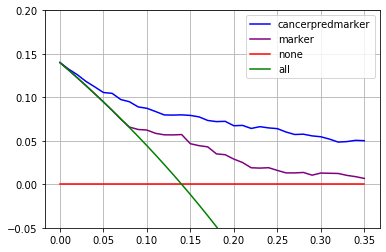

In [10]:
dcurves.plot_net_benefit_graphs(binary_output_df)

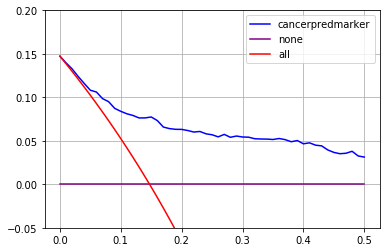

In [11]:
dcurves.plot_net_benefit_graphs(survival_output_df)

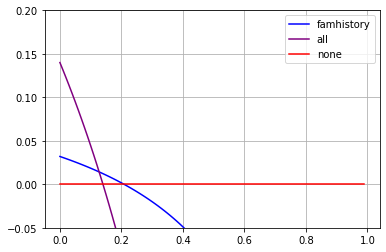

In [12]:
dcurves.plot_net_benefit_graphs(dan_test_output_df)


In [14]:
# dan_test_output_df.to_csv('/Users/ShaunPorwal/Desktop/dan_test_python_output.tsv')

In [15]:
# dan_test_output_df